In [16]:
import os
import pandas as pd

In [14]:
path = "/Users/wangshuaibo/Documents/ScriptsofShuai/gaitpy_exercise/"
os.chdir(path)

In [15]:
xsens_file = "20230413跺脚走6步路测试-XsensMVN.xlsx"

In [17]:
excelfile = pd.ExcelFile(xsens_file)

In [21]:
sheetnames = excelfile.sheet_names
sheetnames

['General Information',
 'Markers',
 'Segment Orientation - Quat',
 'Segment Orientation - Euler',
 'Segment Position',
 'Segment Velocity',
 'Segment Acceleration',
 'Segment Angular Velocity',
 'Segment Angular Acceleration',
 'Joint Angles ZXY',
 'Joint Angles XZY',
 'Ergonomic Joint Angles ZXY',
 'Ergonomic Joint Angles XZY',
 'Center of Mass',
 'Sensor Free Acceleration',
 'Sensor Magnetic Field',
 'Sensor Orientation - Quat',
 'Sensor Orientation - Euler']

In [22]:
df = pd.read_excel(xsens_file,sheet_name='Sensor Free Acceleration')

In [23]:
df.head(3)

,Frame,Pelvis x,Pelvis y,Pelvis z,L5 x,L5 y,L5 z,L3 x,L3 y,L3 z,T12 x,T12 y,T12 z,T8 x,T8 y,T8 z,Neck x,Neck y,Neck z,Head x,Head y,Head z,Right Shoulder x,Right Shoulder y,Right Shoulder z,Right Upper Arm x,Right Upper Arm y,Right Upper Arm z,Right Forearm x,Right Forearm y,Right Forearm z,Right Hand x,Right Hand y,Right Hand z,Left Shoulder x,Left Shoulder y,Left Shoulder z,Left Upper Arm x,Left Upper Arm y,Left Upper Arm z,Left Forearm x,Left Forearm y,Left Forearm z,Left Hand x,Left Hand y,Left Hand z,Right Upper Leg x,Right Upper Leg y,Right Upper Leg z,Right Lower Leg x,Right Lower Leg y,Right Lower Leg z,Right Foot x,Right Foot y,Right Foot z,Right Toe x,Right Toe y,Right Toe z,Left Upper Leg x,Left Upper Leg y,Left Upper Leg z,Left Lower Leg x,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z
0,0,-0.008742,0.019561,-0.011491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.022198,0.031928,0.015490,-0.030291,0.027199,0.012673,-0.020481,-0.033793,0.004478,0,0,0,0.002913,0.018390,-0.013239,-0.005245,0.010545,-0.000286,0.014797,-0.006973,0.026653,0,0,0
1,1,0.016164,0.015704,0.011848,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.033936,-0.009515,0.057268,0.011431,0.030747,-0.013874,-0.034071,0.022224,-0.010796,0,0,0,0.004074,0.018191,-0.013241,0.045763,-0.000241,-0.017675,0.034946,0.004807,0.019792,0,0,0
2,2,-0.014526,0.054576,-0.023304,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.029544,0.001915,-0.001170,-0.050570,-0.009593,0.017540,0.000290,0.015734,0.012492,0,0,0,0.017936,-0.001576,-0.031757,0.002115,0.029728,-0.028391,0.001224,0.007672,0.012579,0,0,0


In [ ]:
from gaitpy.gait import Gaitpy

raw_data = df
sample_rate = 100 # hertz
subject_height = 170 # centimeters

#### Create an instance of Gaitpy ####
gaitpy = Gaitpy(raw_data,                           # Raw data consisting of vertical acceleration from lumbar location and unix timestamps
                sample_rate,                        # Sample rate of raw data (in Hertz)
                v_acc_col_name='y',                 # Vertical acceleration column name
                ts_col_name='timestamps',           # Timestamp column name
                v_acc_units='m/s^2',                # Units of vertical acceleration
                ts_units='ms',                      # Units of timestamps
                flip=False)                         # If baseline data is at +1g or +9.8m/s^2, set flip=True

#### Classify bouts of gait - Optional (use if your data consists of gait and non-gait periods)####
gait_bouts = gaitpy.classify_bouts(result_file='/my/folder/classified_gait.h5')     # File to save results to (None by default)

#### Extract gait characteristics ####
gait_features = gaitpy.extract_features(subject_height,                               # Subject height
                                        subject_height_units='centimeter',            # Units of subject height
                                        result_file='/my/folder/gait_features.csv',   # File to save results to (None by default)
                                        classified_gait=gait_bouts)                   # Pandas Dataframe or .h5 file results of classify_bouts function (None by default)

#### Plot results of gait feature extraction ####
gaitpy.plot_contacts(gait_features,                                     # Pandas Dataframe or .csv file results of extract_features function
                     result_file='/my/folder/plot_contacts.html)',      # File to save results to (None by default)
                     show_plot=True)                                    # Specify whether to display plot upon completion (True by default)


In [3]:
import pandas as pd

# 创建一个 DataFrame
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})

df1

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [4]:
# 创建一个包含 DataFrame 的单元格
cell = pd.DataFrame({'D': [10, 11, 12], 'E': [13, 14, 15], 'F': [16, 17, 18]})

# 使用 update 函数将数据合并到 df1 的单元格中
df1.update(cell)

In [5]:
df1

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [1]:
import re

In [18]:
regex = r"(.*).(.*)"
file = "20220222_flomo_Visual_Analysis.ipynb"
endwith = re.search(regex,file).group(1)

In [17]:
endwith

'20220222_flomo_Visual_Analysis.ipynb'

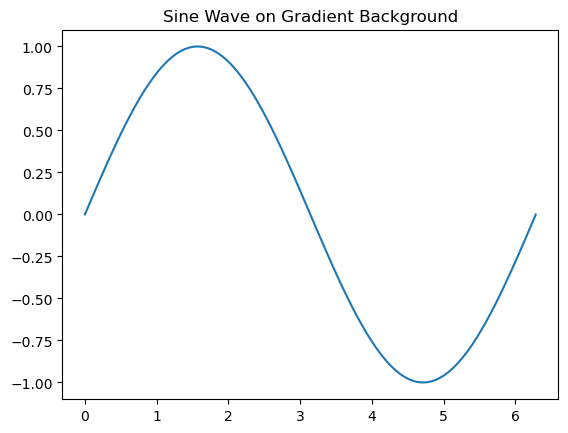

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个 100x100 的二维数组，每个元素的值为从 0 到 1 的随机数
data = np.random.rand(100, 100)

# 创建一个新的 figure 和 axes 对象
fig, ax = plt.subplots()

# 绘制一个填充整个画布的矩形，并将其作为背景
#ax.imshow(data, cmap='Blues', extent=[0, 13, 0, 13], alpha=0.01, aspect='auto', zorder=-1)

# 绘制正弦曲线
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
ax.plot(x, y)

# 设置 plot 的标题
ax.set_title('Sine Wave on Gradient Background')

plt.show()


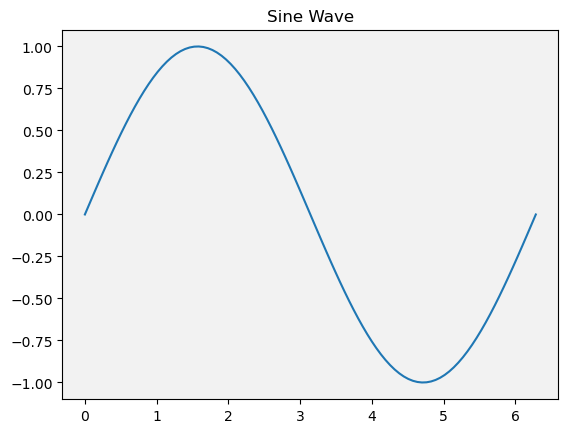

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个新的 figure 和 axes 对象
fig, ax = plt.subplots()

# 绘制正弦曲线
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
ax.plot(x, y)

# 设置 plot 的标题
ax.set_title('Sine Wave')

# 设置画布背景色为浅灰色
ax.set_facecolor('#f2f2f2')

plt.show()


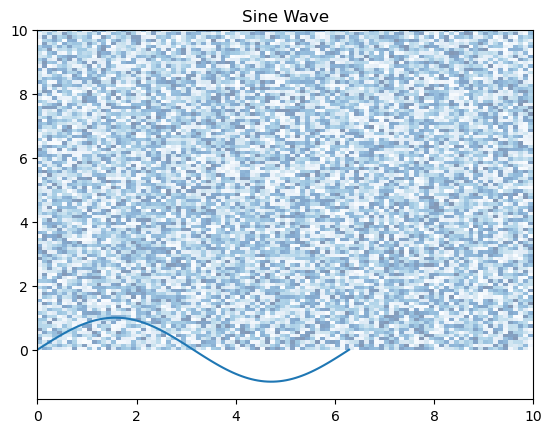

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个 100x100 的二维数组，每个元素的值为从 0 到 1 的随机数
data = np.random.rand(100, 100)

# 创建一个新的 figure 和 axes 对象
fig, ax = plt.subplots()

# 绘制一个填充整个画布的矩形，并将其作为背景
ax.imshow(data, cmap='Blues', extent=[0, 10, 0, 10], alpha=0.5, aspect='auto', zorder=-1)

# 绘制正弦曲线
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
ax.plot(x, y)

# 设置 plot 的标题
ax.set_title('Sine Wave')

plt.show()


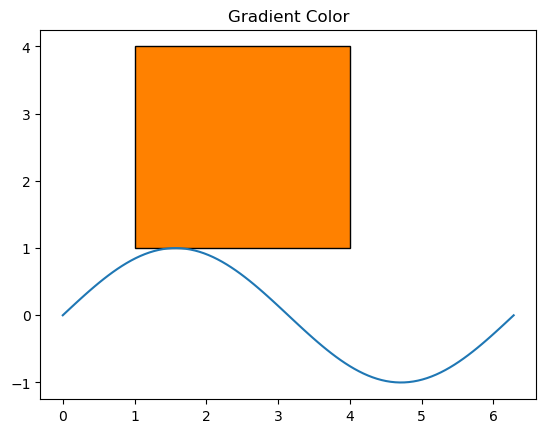

In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QLineEdit, QPushButton, QVBoxLayout


class BMIWidget(QWidget):
    def __init__(self):
        super().__init__()

        # 创建标签和文本框控件
        self.height_label = QLabel("身高（米）：")
        self.height_edit = QLineEdit()
        self.weight_label = QLabel("体重（千克）：")
        self.weight_edit = QLineEdit()
        self.result_label = QLabel()

        # 创建计算按钮
        self.calculate_button = QPushButton("计算")
        self.calculate_button.clicked.connect(self.calculate_bmi)

        # 创建布局管理器
        layout = QVBoxLayout()
        layout.addWidget(self.height_label)
        layout.addWidget(self.height_edit)
        layout.addWidget(self.weight_label)
        layout.addWidget(self.weight_edit)
        layout.addWidget(self.calculate_button)
        layout.addWidget(self.result_label)

        # 设置窗口的布局管理器
        self.setLayout(layout)

    def calculate_bmi(self):
        # 获取身高和体重的值
        height = float(self.height_edit.text())
        weight = float(self.weight_edit.text())

        # 计算 BMI 值
        bmi = weight / (height ** 2)

        # 显示计算结果
        self.result_label.setText("您的BMI值为：{:.2f}".format(bmi))


if __name__ == '__main__':
    # 创建应用程序对象
    app = QApplication(sys.argv)

    # 创建窗口对象
    window = BMIWidget()
    window.setWindowTitle("BMI计算器")
    window.resize(300, 200)

    # 显示窗口
    window.show()

    # 运行应用程序，进入事件循环
    sys.exit(app.exec_())

2023-05-13 17:43:54.618 python[44677:14140269] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


SystemExit: 0

/Users/wangshuaibo/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


: 

In [1]:
from scipy.spatial.transform import Rotation as R
r = R.from_quat([1,0,0,0])
eulers = r.as_euler("zyx",degrees=True)

In [31]:
# 躯干编号  _00B42268
import numpy as np

opensim_torso_quat = [0.5105588968224414,0.4570645371936038,-0.6688411554744984,0.2882240976375608]
print("Opensim 由xsens 旋转矩阵计算得到的四元数：\n",opensim_torso_quat )

mat11,mat21,mat31 = [-0.060844, -0.317097,  0.946440]
mat12,mat22,mat32 = [-0.905718,  0.416038,  0.081164]
mat13,mat23,mat33 = [-0.419492, -0.852269, -0.312513]

xsens_torso_matrix_11_21_31 = np.array([
                                    [mat11,mat21,mat31],
                                    [mat12,mat22,mat32],
                                    [mat13,mat23,mat33]])

r = R.from_matrix(xsens_torso_matrix_11_21_31)
cal_torso_quat = r.as_quat()
cal_torso_quat_wxyz = [cal_torso_quat[3],cal_torso_quat[0],cal_torso_quat[1],cal_torso_quat[2]]

print("\nScipy 由四元数计算得到的四元数（已经调整四元数的顺序）：\n",
      "旋转矩阵的顺序为：\n",
      "mat11_21_31 \n",
      "mat12_22_32 \n",
      "mat13_23_33 \n",
     cal_torso_quat_wxyz)

xsens_torso_matrix_11_21_31 = np.array([
                                    [mat11,mat12,mat13],
                                    [mat21,mat22,mat23],
                                    [mat31,mat32,mat33]])

r = R.from_matrix(xsens_torso_matrix_11_21_31)
cal_torso_quat = r.as_quat()
cal_torso_quat_wxyz = [cal_torso_quat[3],cal_torso_quat[0],cal_torso_quat[1],cal_torso_quat[2]]

print("\nScipy 由四元数计算得到的四元数（已经调整四元数的顺序）：\n",
      "旋转矩阵的顺序为：\n",
      "mat11_21_31 \n",
      "mat12_22_32 \n",
      "mat13_23_33 \n",
     cal_torso_quat_wxyz)

# 为什么使用 Scipy 计算得到的 quat 和 Opensim 计算得到的 quat 相差一个 "_"


Opensim 由xsens 旋转矩阵计算得到的四元数：
 [0.5105588968224414, 0.4570645371936038, -0.6688411554744984, 0.2882240976375608]

Scipy 由四元数计算得到的四元数（已经调整四元数的顺序）：
 旋转矩阵的顺序为：
 mat11_21_31 
 mat12_22_32 
 mat13_23_33 
 [0.5105588968224414, -0.45706453719360385, 0.6688411554744984, -0.2882240976375608]

Scipy 由四元数计算得到的四元数（已经调整四元数的顺序）：
 旋转矩阵的顺序为：
 mat11_21_31 
 mat12_22_32 
 mat13_23_33 
 [-0.5105588968224414, -0.45706453719360385, 0.6688411554744984, -0.2882240976375608]
